In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [5]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
for col in strings:
    df[col] = df[col].str.lower().str.replace(" ", "_")

# 2.3 Exploratory Data Analysis

In [6]:
import matplotlib.pyplot as plt
import seaborn as sb

# Setting Up The Validation Framework

In [7]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_val + n_test)

In [8]:
# test again : same computer, same result
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
df_train.head(5)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [9]:
len(df_val), len(df_test), len(df_train)

(2382, 2382, 7150)

In [10]:
# drop index
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)

In [11]:
# set log
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)
y_train = np.log1p(df_train.msrp.values)

In [12]:
# # remove data not to use it accidently
del df_val['msrp']
del df_test['msrp']
del df_train['msrp']

# Linear Regression

In [79]:
# engine hp, city mpg, popularity to feature matrix
xi = [df_train.iloc[10]['engine_hp'], df_train.iloc[10]['city_mpg'], df_train.iloc[10]['popularity']]

In [80]:
w0 = 0
w = [0.01, 0.04, 0.002]

In [81]:
def linear_regression(xi):
    n = len(xi)
    pred = w0
    for j in range(n):
        pred = pred + w[j] * xi[j]
    return pred

In [82]:
linear_regression(xi)

4.718

In [83]:
np.expm1(3.8819999999999997) # undo logarithm -> do exponent!

47.52116041451591

# Linear Regression Vector

In [84]:
def dot(xi, w):
    n = len(xi)
    res = 0.0

    for j in range(n):
        res += xi[j] * w[j]

    return res

In [85]:
w_new = [w0] + w

In [86]:
w_new

[0, 0.01, 0.04, 0.002]

In [87]:
xi = [155, 29, 586]
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [88]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [89]:
def linear_regression(X):
    return X.dot(w_new)

In [90]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

# Training Linear Regression

In [91]:
X = [
        [148,  24, 1385],
        [132,  25, 2031],
        [453,  11, 86],
        [158,  24, 1385],
        [172,  25, 201],
        [413,  11, 86],
        [38,  54, 185],
        [142,  25, 431],
        [453,  31, 86],
]
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24, 1385],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [92]:
ones = np.ones(X.shape[0])

In [93]:
X = np.column_stack([ones, X]).round() # add 1 to front of this matrix

In [94]:
y = [10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]

In [95]:
XTX = X.T.dot(X) # gram matrix

In [96]:
XTX_inv = np.linalg.inv(XTX)

In [97]:
XTX.dot(XTX_inv).round(1) # actually, it is not really identity matrix, but the values are really tiny,,

array([[ 1.,  0.,  0., -0.],
       [ 0.,  1., -0., -0.],
       [ 0.,  0.,  1., -0.],
       [ 0.,  0.,  0.,  1.]])

In [98]:
w_full = XTX_inv.dot(X.T).dot(y)

In [99]:
w0 = w_full[0] # bias
w = w_full[1:]

In [100]:
w0, w

(24360.407560885404, array([ -13.5150727 , -183.80348802,    0.60150145]))

In [101]:
X = [
        [148,  24, 1385],
        [132,  25, 2031],
        [453,  11, 86],
        [158,  24, 1385],
        [172,  25, 201],
        [413,  11, 86],
        [38,  54, 185],
        [142,  25, 431],
        [453,  31, 86],
]
X = np.array(X)

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X]).round()
    XTX = X.T.dot(X) # gram matrix
    XTX_inv = np.linalg.inv(XTX)
    XTX.dot(XTX_inv).round(1)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:] # bias, weights

In [102]:
train_linear_regression(X, y)

(24360.407560885404, array([ -13.5150727 , -183.80348802,    0.60150145]))

# Baseline Model for Car Price Prediction Project

In [103]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385
1,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617
2,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,36,26,5657
3,acura,tlx,2016,premium_unleaded_(recommended),290.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,34,21,204
4,volkswagen,beetle_convertible,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,34,25,873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4759,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385
4760,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640
4761,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851
4762,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202


In [104]:
df_train.dtypes
# we will use these features: engine_hp, engine_cylinders, highway_mpg, city_mpg, popularity

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [105]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,200.0,4.0,25,19,1385
1,241.0,4.0,29,22,617
2,160.0,4.0,36,26,5657
3,290.0,6.0,34,21,204
4,170.0,4.0,34,25,873
...,...,...,...,...,...
4759,200.0,6.0,18,13,1385
4760,160.0,4.0,33,29,640
4761,250.0,6.0,22,15,1851
4762,174.0,4.0,42,31,2202


In [106]:
X_train = df_train[base].values

In [107]:
y_train

array([10.19936098, 10.90872279,  9.72770457, ..., 10.27852782,
       10.00789261, 10.40414162])

In [108]:
X_train = df_train[base].fillna(0).values
w0, w = train_linear_regression(X_train, y_train)

In [109]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

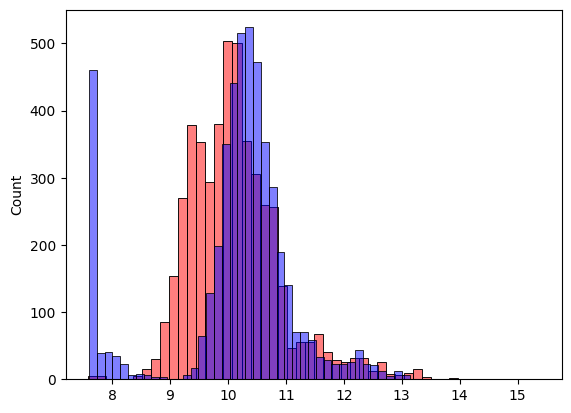

In [110]:
sb.histplot(y_pred, color='red', alpha=0.5, bins=50) # prediction
sb.histplot(y_train, color='blue', alpha=0.5, bins=50) # target value

In [111]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [112]:
rmse(y_train, y_pred) # first value is real value, - 0.7415514275559719

0.7415514275559719

# 2.10 - Computing RMSE on Validation Data

In [113]:
def prepare_X(df):
    df_num = df[base].fillna(0)
    X = df_num.values
    return X

In [114]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.7517221959226256

# Simple Feature Engineering

In [115]:
# df_train.year.max() = 2017
2017 - df_train.year # use this for one of the feature of our model

0        2
1        0
2        0
3        1
4        1
        ..
4759    19
4760     3
4761    11
4762     1
4763     2
Name: year, Length: 4764, dtype: int64

In [130]:
def prepare_X(df):
    df = df.copy() # not to change original dataframe
    df['age'] = 2017 - df.year
    features = base.copy() + ['age']
    df_num = df[features].fillna(0)
    X = df_num.values
    return X


In [117]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [131]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5172055461058325

<Axes: ylabel='Count'>

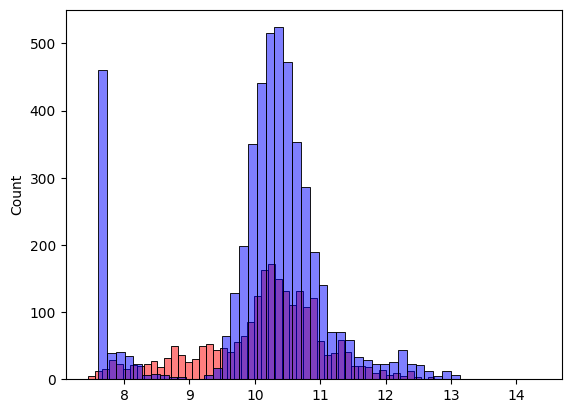

In [119]:
sb.histplot(y_pred, color='red', alpha=0.5, bins=50) # prediction
sb.histplot(y_train, color='blue', alpha=0.5, bins=50) # target value

# Categorical Variables

In [120]:
# df_train.dtypes
(df_train.number_of_doors == 2).astype('int')

0       0
1       0
2       0
3       0
4       1
       ..
4759    0
4760    0
4761    0
4762    0
4763    0
Name: number_of_doors, Length: 4764, dtype: int64

In [121]:
'num_doors_%s' % 2

'num_doors_2'

In [132]:
def prepare_X(df):
    df = df.copy() # not to change original dataframe
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
    
    df_num = df[features]
    print(features)
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [123]:
# X_train = prepare_X(df_train)
# w0, w = train_linear_regression(X_train, y_train)
# X_val = prepare_X(df_val)
# y_pred = w0 + X_val.dot(w)

# rmse(y_val, y_pred)

In [133]:
# 마지막 셀 (execution_count: 66)
# 수정된 y_val을 사용
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train) # y_train은 이미 로그 변환된 값
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

# 로그 변환된 값에 대한 RMSE 계산
# y_val도 로그 변환된 값입니다.
rmse(y_val, y_pred)

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity', 'age', 'num_doors_2', 'num_doors_3', 'num_doors_4']
['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity', 'age', 'num_doors_2', 'num_doors_3', 'num_doors_4']


0.5157995641502287